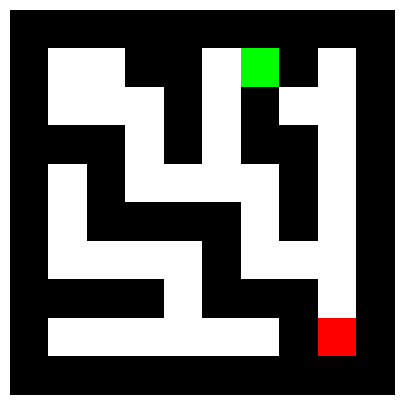

In [73]:
import matplotlib.pyplot as plt
import numpy as np


maze = np.array([
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
    ['#', ' ', ' ', '#', '#', ' ', 'S', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', '#'],
    ['#', '#', '#', ' ', '#', ' ', '#', '#', ' ', '#'],
    ['#', ' ', '#', ' ', ' ', ' ', ' ', '#', ' ', '#'],
    ['#', ' ', '#', '#', '#', '#', ' ', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
    ['#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#'],
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', '#', 'E', '#'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#']
])

color_map = {
    '#': [0, 0, 0],    # black
    'S': [0, 1, 0],    # green
    'E': [1, 0, 0],    # red
    ' ': [1, 1, 1]     # white
}

img = np.zeros((*maze.shape, 3))
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        img[i, j] = color_map[maze[i, j]]

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.show()


In [10]:
#defining the states and actions
actions = {
    'up': (-1,0),
    'down': (1,0),
    'left': (0,-1),
    'right': (0,1)
}

#state : each cell in maze grid is a state
action_list = list(actions.keys())
num_actions = len(action_list)
state_dim = 2  # (row, col)

In [74]:
def step(current_state, action, actions):
  drow, dcol = actions[action]
  next_state = (current_state[0] + drow, current_state[1] + dcol)
  return next_state
#initialising state values
V = np.zeros((len(maze), len(maze[0])))

#discount factor
gamma = 0.9

#Find start and end position
start = np.argwhere(maze == 'S')[0]
end = np.argwhere(maze == 'E')[0]


In [56]:
all_states = []
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        if maze[i, j] != '#':  # not a wall
            all_states.append((i, j))


In [78]:
def step(current_state, action, actions, maze):
    i, j = current_state
    drow, dcol = actions[action]
    ni, nj = i + drow, j + dcol
    # Check bounds and wall
    if 0 <= ni < maze.shape[0] and 0 <= nj < maze.shape[1] and maze[ni, nj] != '#':
        return (ni, nj)
    else:
        return (i, j)  # Stay in place if wall or out of bounds

policy = {}
for _ in range(100):
    for i, j in all_states:
        if (i, j) == end:
            continue
        max_value = -np.inf
        max_action = None
        for action in actions:
            next_state = step((i, j), action, actions, maze)
            if maze[next_state] == '#':
                reward = -1
            elif next_state == end:
                reward = 1
            else:
                reward = 0
            value = reward + gamma * V[next_state] #updation using the bellman equation
            if value > max_value:
                max_value = value
                max_action = action
        policy[(i, j)] = max_action
        V[(i, j)] = max_value


In [79]:
print(V)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.25418658 0.28242954 0.         0.         0.38742049
  0.34867844 0.         0.531441   0.        ]
 [0.         0.28242954 0.3138106  0.34867844 0.         0.43046721
  0.         0.531441   0.59049    0.        ]
 [0.         0.         0.         0.38742049 0.         0.4782969
  0.         0.         0.6561     0.        ]
 [0.         0.         0.         0.43046721 0.4782969  0.531441
  0.59049    0.         0.729      0.        ]
 [0.         0.         0.         0.         0.         0.
  0.6561     0.         0.81       0.        ]
 [0.         0.         0.         0.         0.         0.
  0.729      0.81       0.9        0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.    

In [80]:
print(policy)

{(1, 1): 'down', (1, 2): 'down', (1, 5): 'down', (1, 6): 'left', (1, 8): 'down', (2, 1): 'right', (2, 2): 'right', (2, 3): 'down', (2, 5): 'down', (2, 7): 'right', (2, 8): 'down', (3, 3): 'down', (3, 5): 'down', (3, 8): 'down', (4, 1): 'up', (4, 3): 'right', (4, 4): 'right', (4, 5): 'right', (4, 6): 'down', (4, 8): 'down', (5, 1): 'up', (5, 6): 'down', (5, 8): 'down', (6, 1): 'up', (6, 2): 'up', (6, 3): 'up', (6, 4): 'up', (6, 6): 'right', (6, 7): 'right', (6, 8): 'down', (7, 4): 'up', (7, 8): 'down', (8, 1): 'up', (8, 2): 'up', (8, 3): 'up', (8, 4): 'up', (8, 5): 'up', (8, 6): 'up'}


In [81]:
import matplotlib.pyplot as plt
import numpy as np


current = start
trajectory = [current]
visited = set()
max_steps = 100  # Prevents infinite loops

for _ in range(max_steps):
    if current == end or current not in policy:
        break
    action = policy[current]
    di, dj = actions[action]
    next_state = (current[0] + di, current[1] + dj)
    # Check for wall or out-of-bounds
    if maze[next_state] == '#' or not (0 <= next_state[0] < maze.shape[0] and 0 <= next_state[1] < maze.shape[1]):
        break
    if next_state in visited:
        # Loop detected, stop
        break
    trajectory.append(next_state)
    visited.add(current)
    current = next_state


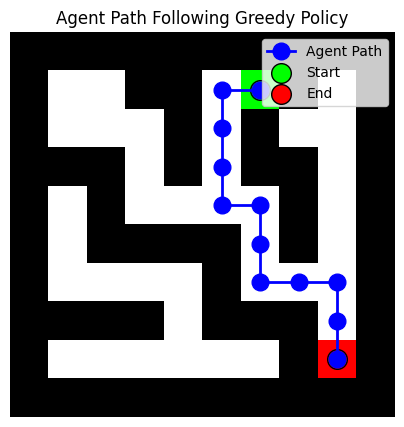

In [82]:
# Create a color map for the maze
color_map = {
    '#': [0, 0, 0],    # black
    'S': [0, 1, 0],    # green
    'E': [1, 0, 0],    # red
    ' ': [1, 1, 1]     # white
}
img = np.zeros((*maze.shape, 3))
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        img[i, j] = color_map[maze[i, j]]

plt.figure(figsize=(5, 5))
plt.imshow(img, interpolation='nearest')
plt.axis('off')

# Plot the agent's path
path_y, path_x = zip(*trajectory)
plt.plot(path_x, path_y, marker='o', color='blue', linewidth=2, markersize=12, label='Agent Path')
plt.scatter([start[1]], [start[0]], color='lime', s=200, edgecolors='black', label='Start')
plt.scatter([end[1]], [end[0]], color='red', s=200, edgecolors='black', label='End')
plt.legend(loc='upper right')
plt.title('Agent Path Following Greedy Policy')
plt.show()
